In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기
data=pd.read_csv('auto-mpg.csv',header=0,engine='python')
data.shape
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
data=data.drop(['car_name','origin','horsepower'],axis=1)
data

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
x=data.drop(['mpg'],axis=1)
y=data['mpg']
 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
 
lr=LinearRegression()
lr.fit(x_train,y_train)
 
y_pred=lr.predict(x_test)

In [17]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
 
print('MSE: {0: .3f},RMSE: {1:.3f}'.format(mse,rmse))
print('R^2(Variance score): {0: .3f}'.format(r2))
 
print('Y절편: ',lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))
 
coef=pd.Series(data=np.round(lr.coef_,2),index=x.columns)
coef.sort_values(ascending=False)

MSE:  12.278,RMSE: 3.504
R^2(Variance score):  0.808
Y절편:  -17.5480572239519
회귀 계수 값: [-0.1  0.  -0.   0.2  0.8]


model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

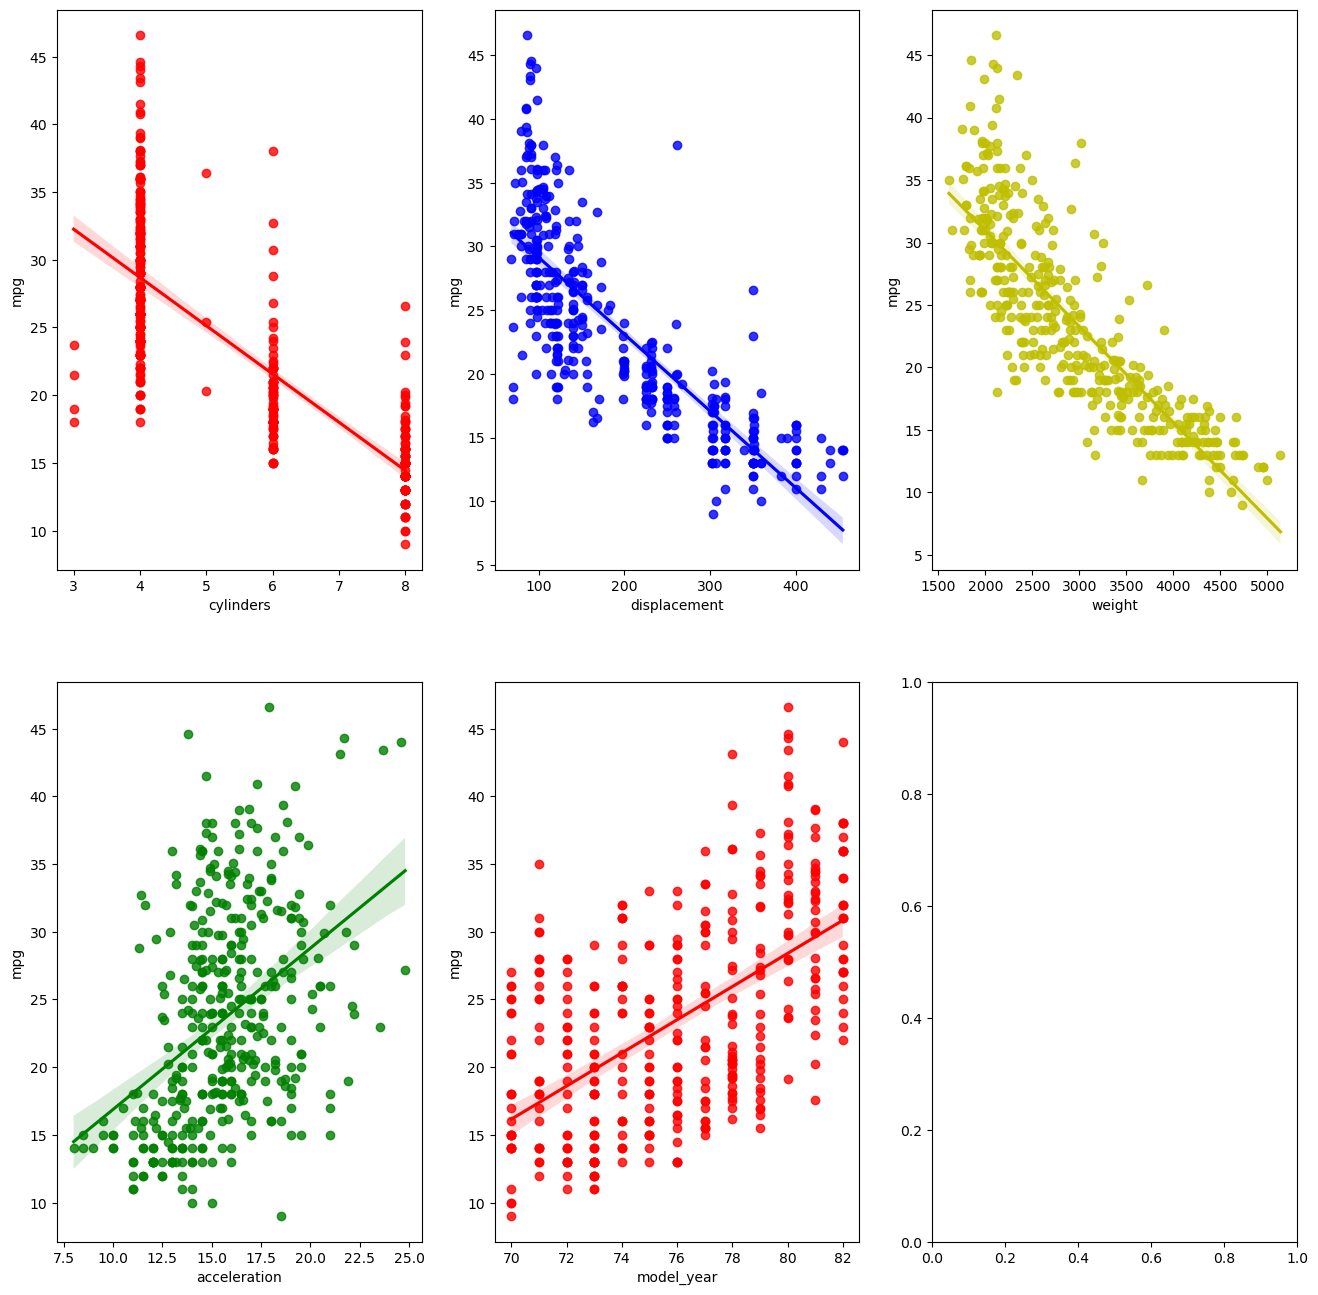

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
 
fig,axes=plt.subplots(figsize=(16,16),ncols=3,nrows=2)
x_features=data.columns[1:]
plot_color=['r','b','y','g','r']
 
for i,feature in enumerate(x_features):
	row=int(i/3)
	col=i%3
	fig=sns.regplot(x=feature, y='mpg',data=data,ax=axes[row][col],color=plot_color[i]).get_figure()
fig.savefig("output.png")

In [21]:
print(" 연비를 예측하고 싶은 차의 정보를 입력하시오.")
cylinders_1=int(input('cylinders: '))
displacement_1=int(input('displacement: '))
weight_1=int(input('weight: '))
acceleration_1=int(input('acceleration: '))
model_year_1=int(input('model_year: '))
 
mpg_pred=lr.predict([[cylinders_1,displacement_1,weight_1,acceleration_1,model_year_1]])
print("이 자동차의 예상연비는 %.2f입니다."%mpg_pred)


 연비를 예측하고 싶은 차의 정보를 입력하시오.


cylinders:  100
displacement:  100
weight:  100
acceleration:  100
model_year:  1000


이 자동차의 예상연비는 746.40입니다.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19908\4273726841.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("이 자동차의 예상연비는 %.2f입니다."%mpg_pred)
